<a href="https://colab.research.google.com/github/CamiloQuevedo/Example/blob/main/Interfaz_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARGAR DATOS**


In [1]:
from google.colab import files

uploaded=files.upload()

Saving Datos Entrenamiento RNA.xlsx to Datos Entrenamiento RNA.xlsx


# **CREAR Y ENTRENAR RED NEURONAL**

Por favor ingrese el numero de entradas de la red neuronal: 3
Por favor ingrese el numero de capas ocultas: 1
Ingrese el numero de neuronas en la capa oculta #1 :7
Funciones de activacion
1.Linear
2.Relu
3.Selu
4.Sigmoid
5.Softmax
6.Tanh
7.Exponential
Digite el numero de la funcion de activacion: 4
Activacion neurona de salida
Funciones de activacion
1.Linear
2.Relu
3.Selu
4.Sigmoid
5.Softmax
6.Tanh
7.Exponential
Digite el numero de la funcion de activacion: 2
Algoritmos de optimizacion
1.Descenso de gradiente estocástico (Adam)
2.Descenso de gradiente con impulso (SGD)
3.Adam basado en la norma del infinito (Adamax
Digite el numero del optimizador: 1
Ingrese el numero de epocas de entrenamiento: 60
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 28        
                                                                 
 dense_

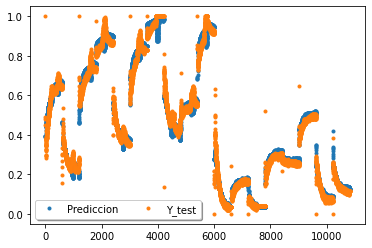

In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import   Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import sys
import tensorflow.lite
import io,os,time
from pylab import *

#------Funciones---------
def FunActi():
  i=0
  while (i<1 or i>7):
    print("Funciones de activacion" )
    print("1.Linear")
    print("2.Relu")
    print("3.Selu")
    print("4.Sigmoid")
    print("5.Softmax")
    print("6.Tanh")
    print("7.Exponential")
    i=int(input("Digite el numero de la funcion de activacion: "))
  if(i==1):
    Facti='linear'
  elif (i==2):
    Facti='relu'
  elif (i==3):
    Facti='selu'
  elif (i==4):
    Facti='sigmoid'
  elif (i==5):
    Facti='softmax'
  elif (i==6):
    Facti='tanh'
  else:
    Facti='exponential'
  return (Facti)

def FunOptimi():
  i=0
  while (i<1 or i>3):
    print("Algoritmos de optimizacion" )
    print("1.Descenso de gradiente estocástico (Adam)")
    print("2.Descenso de gradiente con impulso (SGD)")
    print("3.Adam basado en la norma del infinito (Adamax")
    i=int(input("Digite el numero del optimizador: "))
  if(i==1):
    Opti='adam'
  elif (i==2):
    Opti='SGD'
  else:
    Opti='Adamax'
  return (Opti)

def DataFrame():
  global datos
  global X_test
  global Y_test
  global X_train
  global Y_train
  #X_test=datos.iloc[:DValidation]
  #Y_test=X_test.iloc[:, Ninputs+1:Ninputs+2]
  #X_test=X_test.iloc[:, 1:Ninputs+1]
  #datos=datos.drop(range(0,DValidation),axis=0)
  X_train=datos.iloc[:, 1:Ninputs+1]
  Y_train=datos.iloc[:, Ninputs+1:Ninputs+2]
  Y_test=Y_train
  X_test=X_train
  #print(X_test)
  #print(Y_test)
  #print(X_train)
  #print(Y_train)

#-----Variables----------
x=0
con=0
data=''
X_train=''
Y_train=''
X_test=''
Y_test=''

datos=pd.read_excel(io.BytesIO(uploaded['Datos Entrenamiento RNA.xlsx']),skiprows=1,header=None)
datos=datos/100
DValidation=int(len(datos)*0.1)

Ninputs=int(input("Por favor ingrese el numero de entradas de la red neuronal: "))

DataFrame()

Co=int(input("Por favor ingrese el numero de capas ocultas: "))
for i in range (Co+1):
  if (i==0):
    model=Sequential()
    Nn=input("Ingrese el numero de neuronas en la capa oculta #"+str(i+1)+" :")
    model.add(Dense(Nn,input_dim=Ninputs, activation=FunActi()))
  elif (i==Co):
    print("Activacion neurona de salida")
    model.add(Dense(1, activation=FunActi()))
    model.compile(loss='mse',optimizer=FunOptimi())
  else:
    Nn=input("Ingrese el numero de neuronas en la capa oculta #"+str(i+1)+" :")
    model.add(Dense(Nn, activation=FunActi()))
Nepocas=int(input("Ingrese el numero de epocas de entrenamiento: "))
model.summary()

history = model.fit(X_train,
                      Y_train,
                      epochs=Nepocas,
                      batch_size=8,
                      validation_data=(X_test,Y_test))

#scores = model.evaluate(X_test,Y_test)
plt.plot(model.predict(X_test),'.',label="Prediccion")
plt.plot(Y_test,'.',label="Y_test")
leg = plt.legend(ncol=2, shadow=True)

# **Descargar modelo**

In [3]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
open("/content/model.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp_1tjwqf9/assets


1540

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Requerimientos**



print(tf.__version__) -> 2.5.0

print(pd.__version__) -> 1.1.5

print(matplotlib.__version__) -> 3.2.2

!python -V -> Python 3.7.11

print(sys.version) -> 3.7.11 (default, Jul  3 2021, 18:01:19) [GCC 7.5.0]